In [362]:
#importing librarier
import matplotlib.pyplot as plt
import numpy as np
import math


In [363]:
#defining sigmoid function and its derivative
def sigmoid (x):
    return 1/(1+np.exp(-x))

def sigmoid_der (x):
    return sigmoid(x)*(1-sigmoid(x))

#mean , standard deviation for noise
mean=0
std=0.05

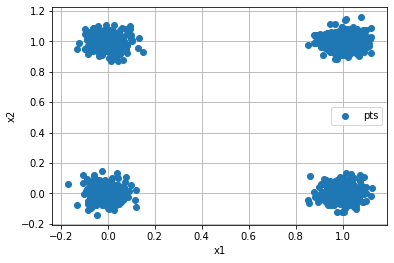

epoch: 1
Training error 0.23616554729366293
Testing error 0.2576470160598941
epoch: 2
Training error 0.218034504313113
Testing error 0.2340598423537361
epoch: 3
Training error 0.18555413486822112
Testing error 0.1958476169676667
epoch: 4
Training error 0.1422529220322078
Testing error 0.14884833600813754
epoch: 5
Training error 0.0892985611574966
Testing error 0.09283204270283645
epoch: 6
Training error 0.05247186015885001
Testing error 0.054362015775686195
epoch: 7
Training error 0.03468741157631141
Testing error 0.035843912342352235
epoch: 8
Training error 0.025587367034702265
Testing error 0.026379238693559955
epoch: 9
Training error 0.020206308690309514
Testing error 0.020792716266518955
epoch: 10
Training error 0.01666104631290792
Testing error 0.01711961013443869
epoch: 11
Training error 0.014151488725048168
Testing error 0.01452422356461016
epoch: 12
Training error 0.01228499110464891
Testing error 0.012596609332420159
epoch: 13
Training error 0.010845507924817692
Testing error 

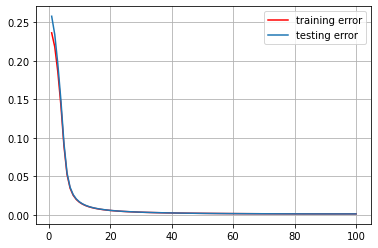

In [372]:
# The follwoing is for OR
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=1000
N=int(0.8*T)
M=int(0.2*T)

y=np.ones(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i]==0 or x2[i]==0:
        y[i]=0
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    
#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()

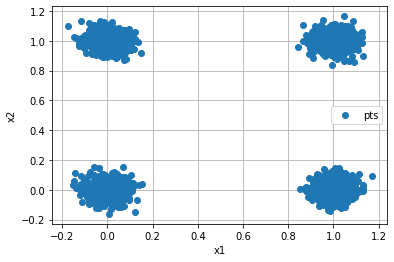

epoch: 1
Training error 0.7053556580946719
Testing error 0.7081856814803866
epoch: 2
Training error 0.024486455168030226
Testing error 0.02432256777278233
epoch: 3
Training error 0.00928612018722234
Testing error 0.009256360283906443
epoch: 4
Training error 0.005391939346037346
Testing error 0.005391059270592215
epoch: 5
Training error 0.0037107095723603223
Testing error 0.0037199283769449878
epoch: 6
Training error 0.00279468600416301
Testing error 0.0028082644973217944
epoch: 7
Training error 0.002225461558352417
Testing error 0.0022411218954844843
epoch: 8
Training error 0.0018405264648398499
Testing error 0.0018572127130959519
epoch: 9
Training error 0.0015643931618090049
Testing error 0.0015815638972091323
epoch: 10
Training error 0.0013574932858879311
Testing error 0.0013748513992699087
epoch: 11
Training error 0.0011971922859633005
Testing error 0.0012145672066785145
epoch: 12
Training error 0.001069655246337621
Testing error 0.0010869463465113837
epoch: 13
Training error 0.0009

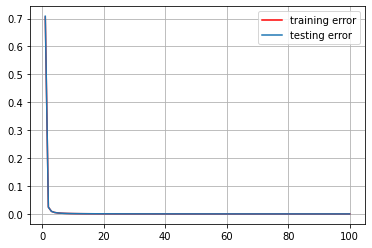

In [365]:
# The follwoing is for OR
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=2500
N=int(0.8*T)
M=int(0.2*T)

y=np.zeros(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i] or x2[i]:
        y[i]=1
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)

#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()

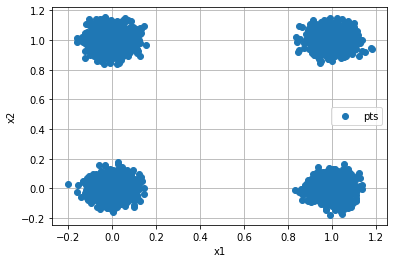

epoch: 1
Training error 0.02143131948655199
Testing error 0.02142083465896807
epoch: 2
Training error 0.006193343882056322
Testing error 0.006159672060857439
epoch: 3
Training error 0.003271274848057229
Testing error 0.0032809666243623276
epoch: 4
Training error 0.002146466320390913
Testing error 0.0021805050248901816
epoch: 5
Training error 0.0015674408975324577
Testing error 0.00161438429802296
epoch: 6
Training error 0.0012194993668551942
Testing error 0.0012731131712421778
epoch: 7
Training error 0.0009893783474102266
Testing error 0.00104615320081311
epoch: 8
Training error 0.0008269263333879535
Testing error 0.000884820992070036
epoch: 9
Training error 0.0007066997855560948
Testing error 0.0007645010884064598
epoch: 10
Training error 0.0006144821841537802
Testing error 0.0006714633290032994
epoch: 11
Training error 0.0005417357526417428
Testing error 0.0005974650229189332
epoch: 12
Training error 0.00048303763676357824
Testing error 0.0005372668574762182
epoch: 13
Training error 

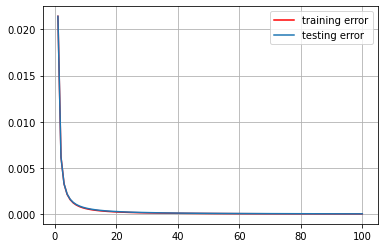

In [368]:
# The follwoing is for OR
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=5000
N=int(0.8*T)
M=int(0.2*T)

y=np.zeros(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i] or x2[i]:
        y[i]=1
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)

#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()